link of data =  Heart Failure Prediction Dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [30]:
df1 = pd.read_csv("heart.csv")
df1.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df1.shape


(918, 12)

In [32]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [33]:
df1['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [34]:
df1['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [35]:
df1['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [36]:
df1['HeartDisease'].unique()

array([0, 1])

In [37]:
df1['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
df1 = pd.read_csv("heart.csv")
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [41]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


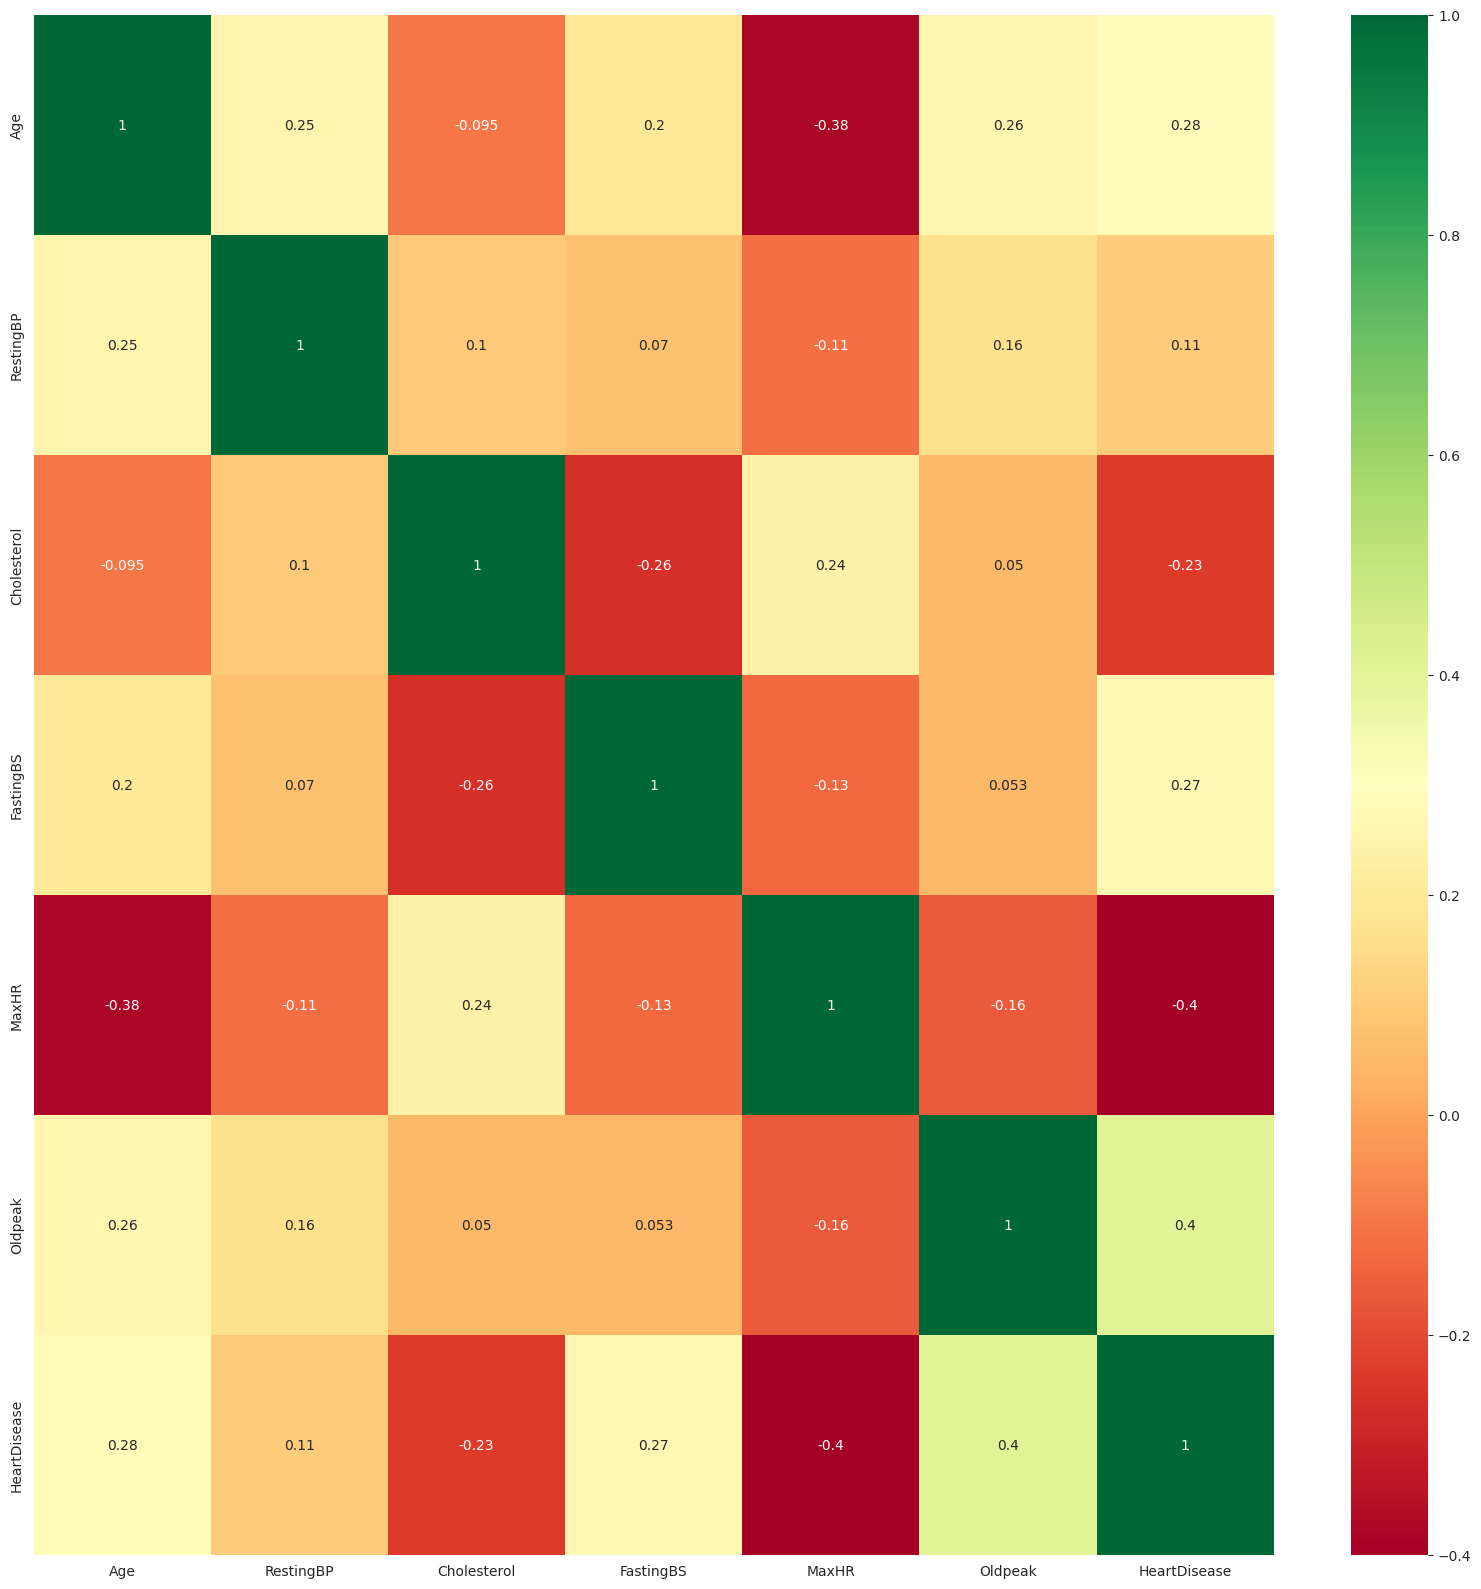

In [42]:
import seaborn as sns
numeric_columns = df1.select_dtypes(include='number')
corrmat = numeric_columns.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df1[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

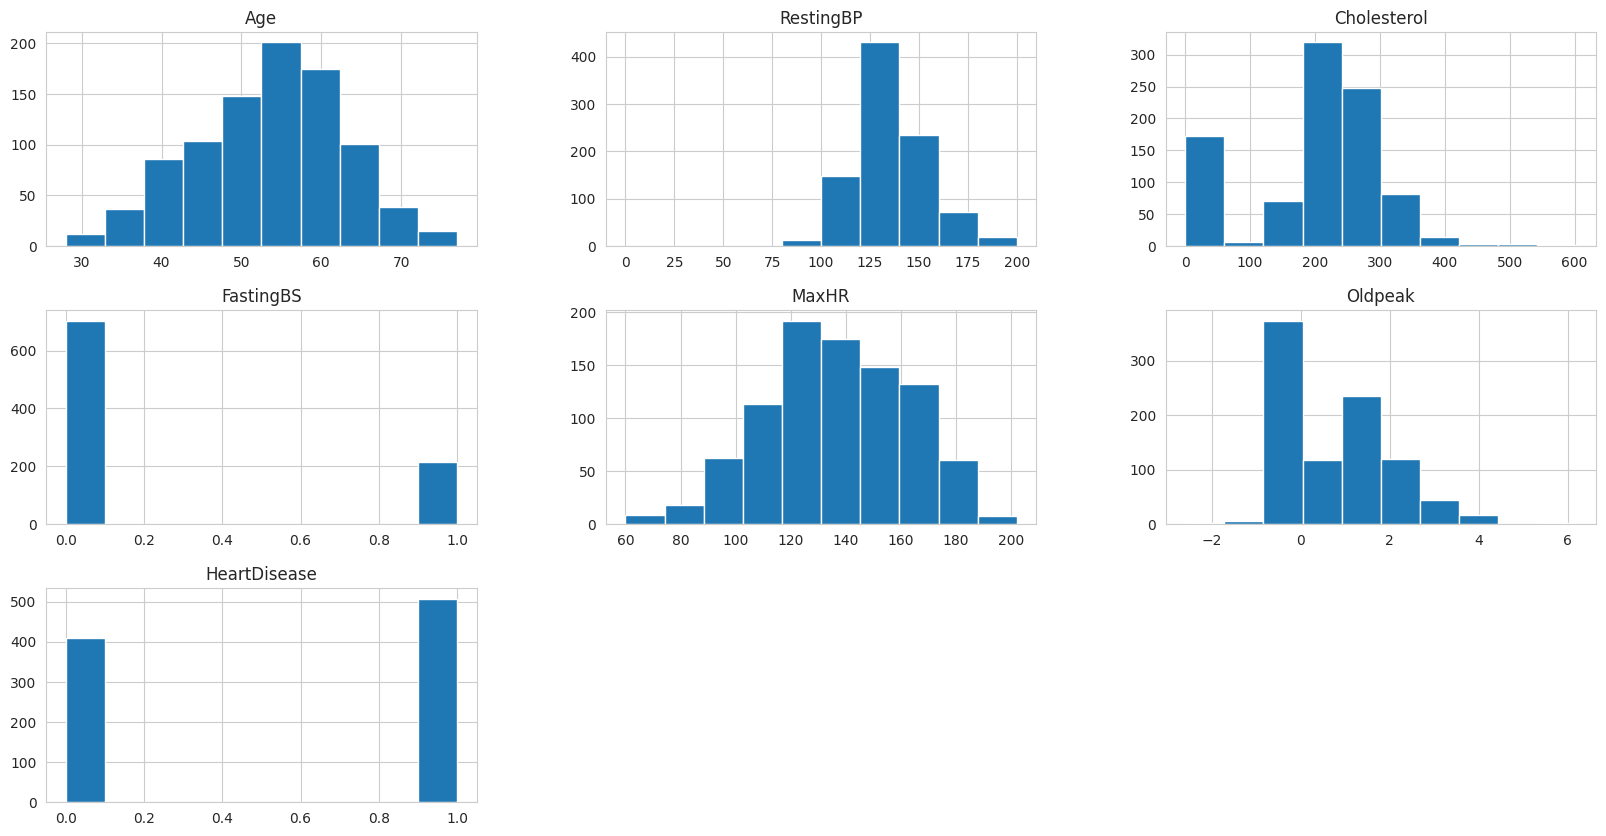

In [43]:
df1.hist()

/tmp/ipykernel_3315/932407396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType',data=df1,palette='RdBu_r')


<Axes: xlabel='ChestPainType', ylabel='count'>

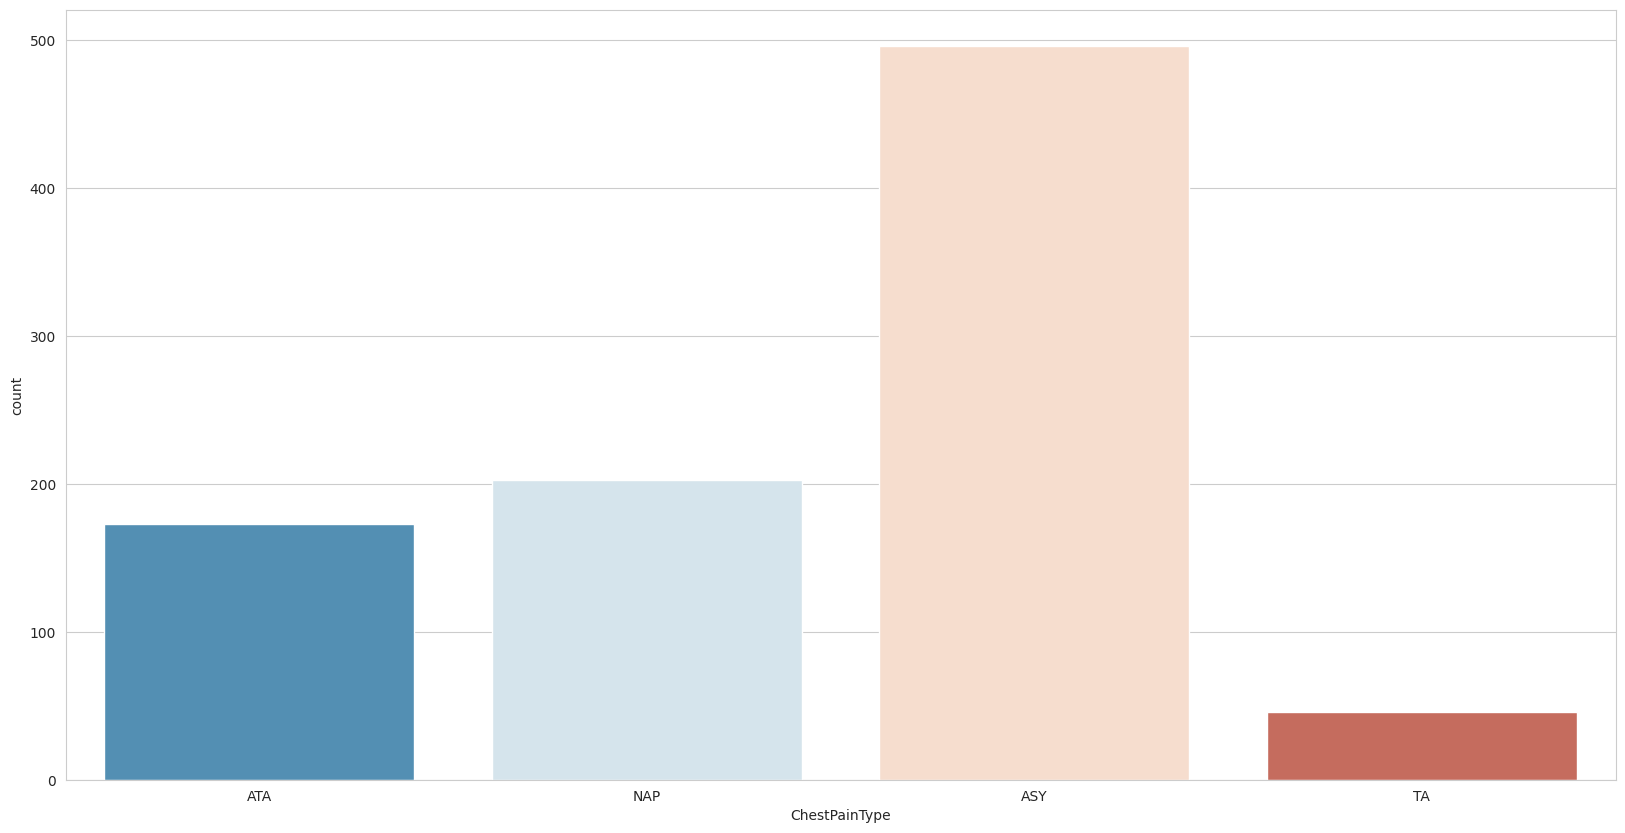

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='ChestPainType',data=df1,palette='RdBu_r')

/tmp/ipykernel_3315/2060266005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df1,palette='RdBu_r')


<Axes: xlabel='HeartDisease', ylabel='count'>

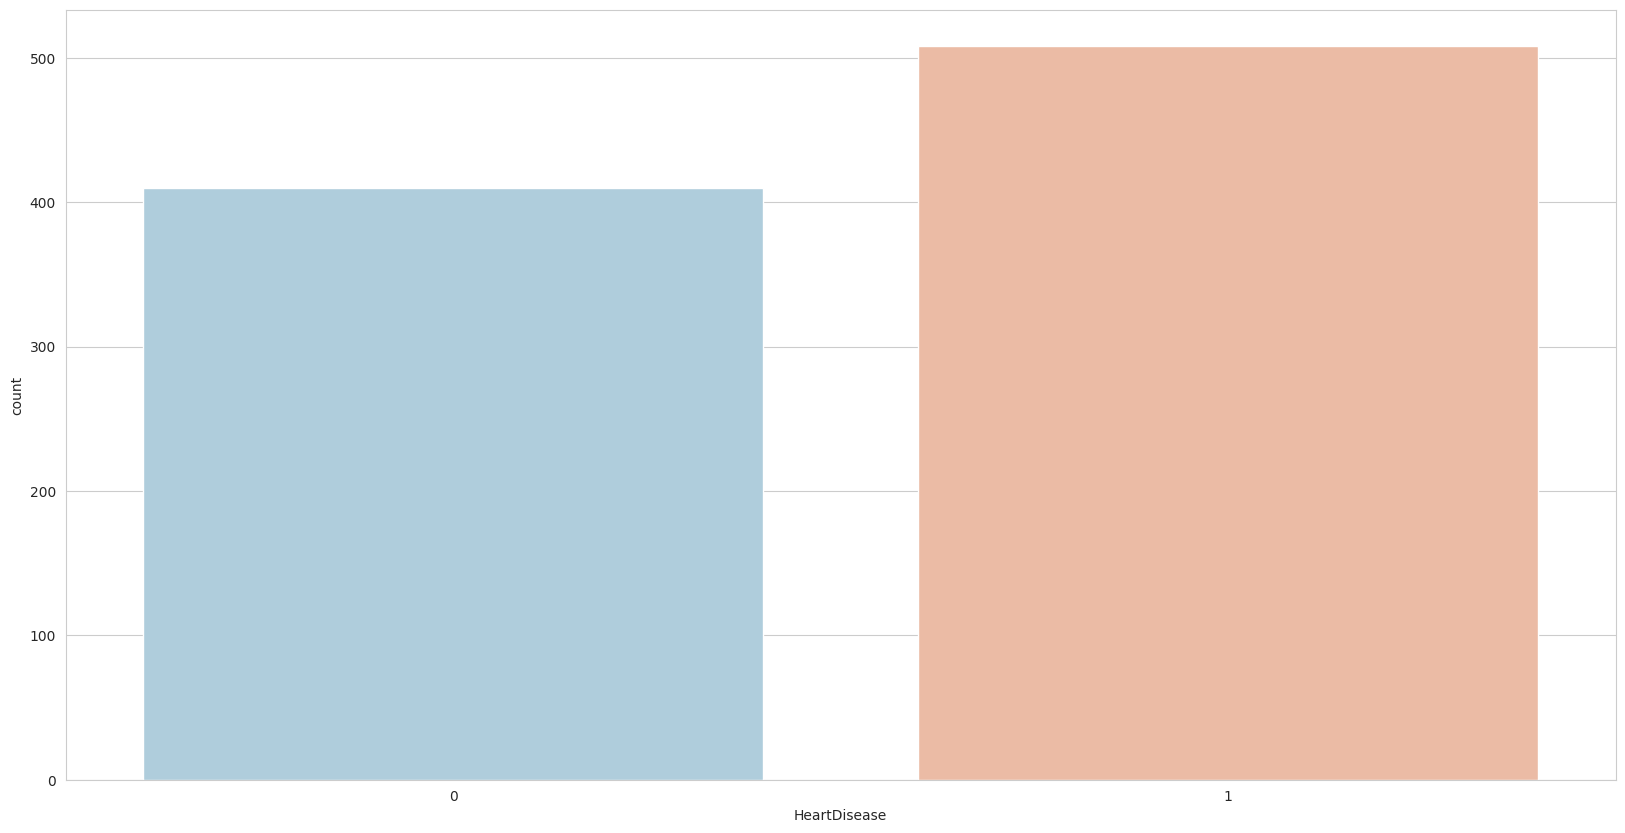

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df1,palette='RdBu_r')

/tmp/ipykernel_3315/625796611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age',data=df1,palette='RdBu_r')


<Axes: xlabel='Age', ylabel='count'>

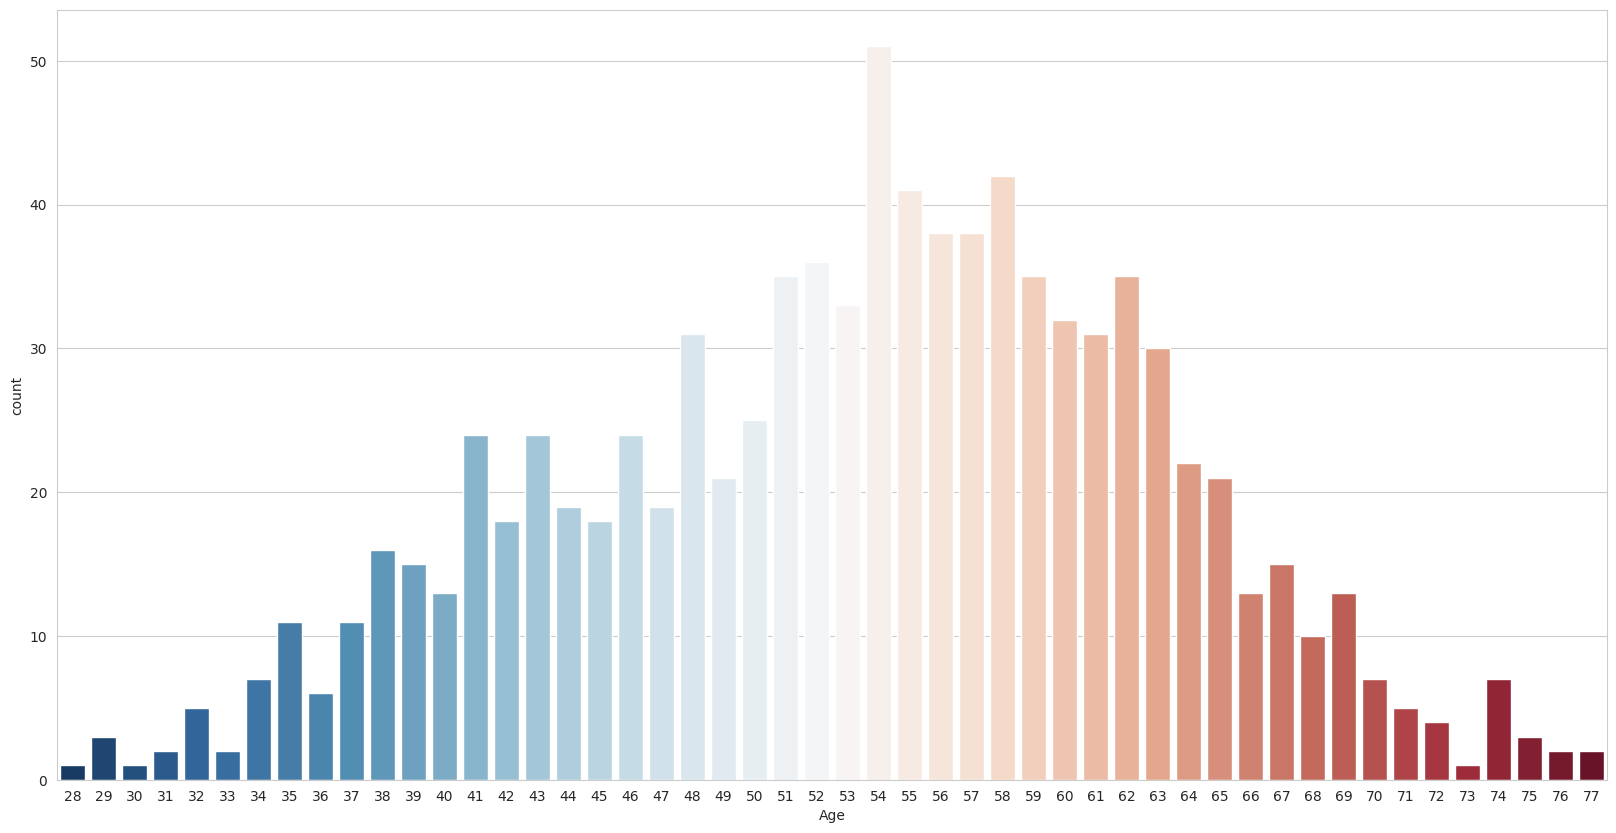

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='Age',data=df1,palette='RdBu_r')

/tmp/ipykernel_3315/3468219085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Oldpeak',data=df1,palette='RdBu_r')


<Axes: xlabel='Oldpeak', ylabel='count'>

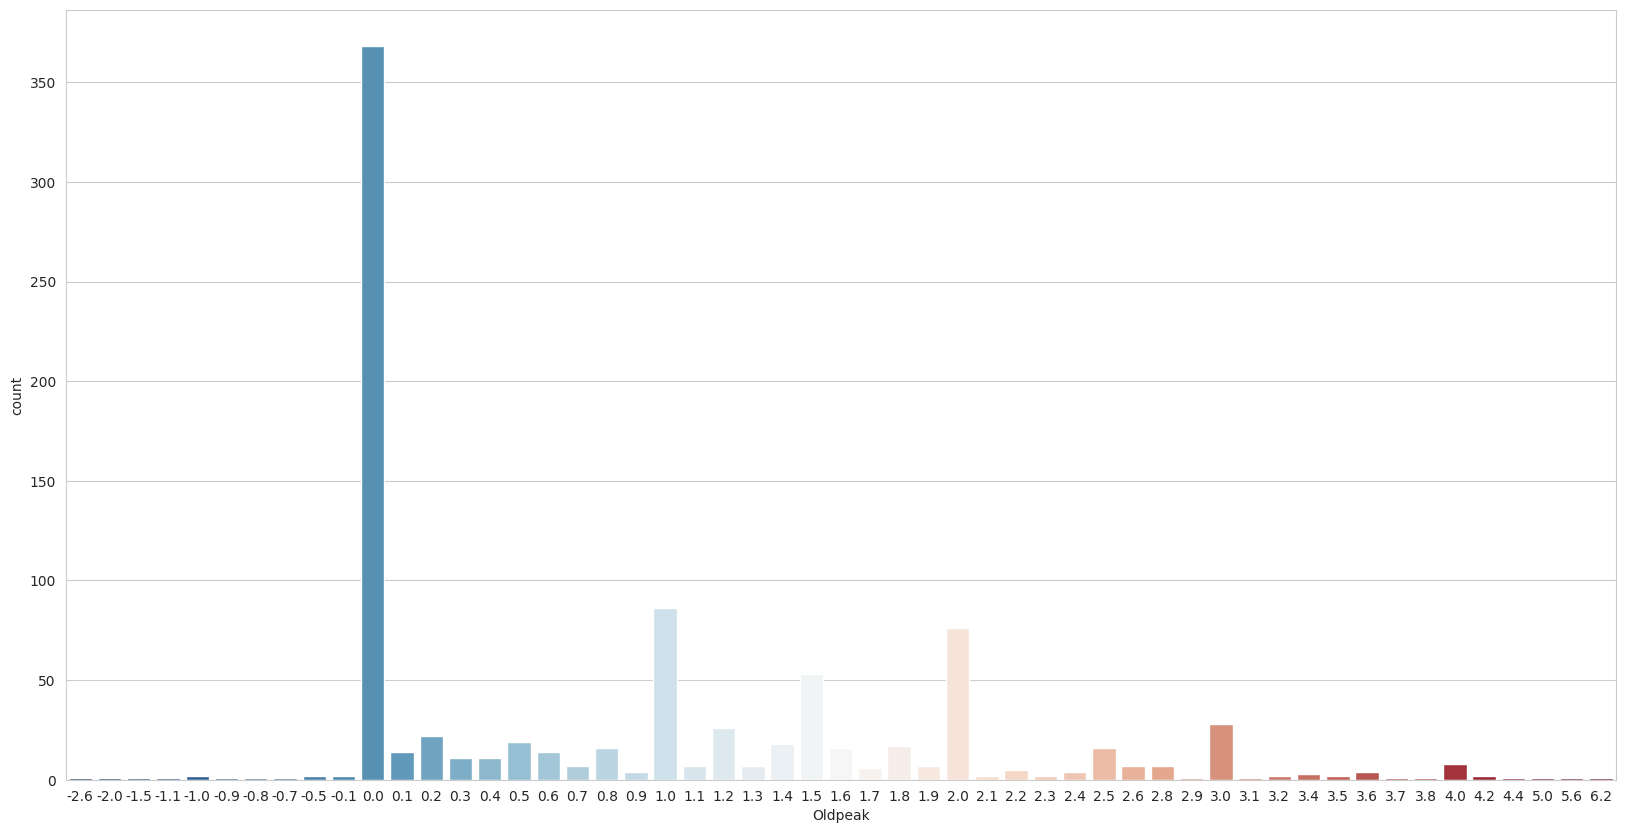

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Oldpeak',data=df1,palette='RdBu_r')

In [49]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [50]:
dataset = pd.get_dummies(df1, columns=['Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBP','MaxHR', 'Oldpeak','HeartDisease']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [52]:
dataset.head()

,Age,RestingBP,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,1.382928,-0.832432,-1.113115,False,True,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,-0.478484,1.491752,0.754157,0.105664,0.898380,True,False,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,-1.525138,-0.832432,-1.113115,False,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,-0.584556,0.302825,-1.132156,0.574711,0.898380,True,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,0.051881,0.951331,-0.581981,-0.832432,-1.113115,False,True,False,False,True,...,True,False,False,True,False,True,False,False,False,True


In [53]:
y = dataset['HeartDisease']
X = dataset.drop(['HeartDisease'], axis = 1)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'y' is the target variable and 'X' is the feature matrix
# Make sure 'y' is categorical (discrete) indicating classes (e.g., 0 or 1 for binary classification)

# Correct any issues with the data type of 'y' (if needed)
y = y.astype(int)  # Convert 'y' to integer type if it's not already

knn_scores = []

# Iterate over different values of k
for k in range(1, 21):
    # Create a KNeighborsClassifier with k neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross_val_score to perform cross-validation and get accuracy scores
    scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')  # Assuming you are using accuracy as the scoring metric
    
    # Append the mean accuracy score to the list
    knn_scores.append(scores.mean())

# Now you can analyze the performance of the KNN classifier for different values of k


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

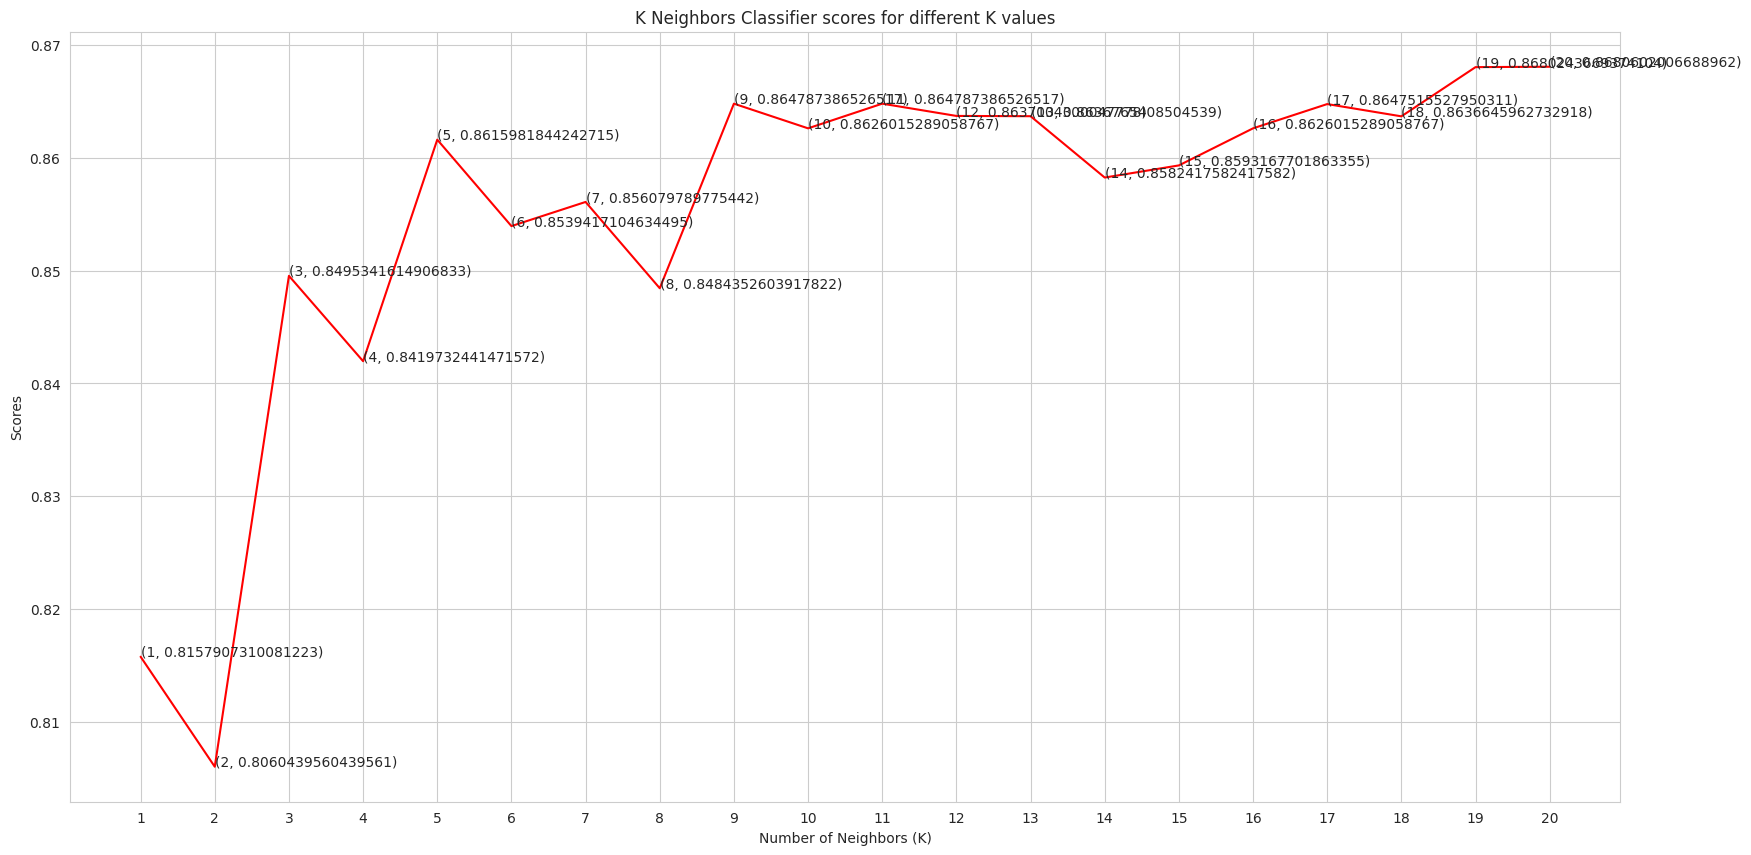

In [56]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [62]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [63]:
score.mean()

0.8637004300047778

In [64]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [65]:
score.mean()

0.8418776875298615